In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-payment-fraud-detection


In [3]:
df = pd.read_csv(path + "/onlinefraud.csv")
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical columns:")
print(numerical_cols)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Categorical columns:
['type', 'nameOrig', 'nameDest']


In [7]:
count = df['isFraud'].value_counts()
print("No of Frauds done: ", count[1])
print("No of Non-Frauds done: ", count[0])

No of Frauds done:  8213
No of Non-Frauds done:  6354407


In [8]:
print("\nDescriptive statistics for numerical columns:")
print(df[numerical_cols].describe())


Descriptive statistics for numerical columns:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000


Correlation between numerical columns:
                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        

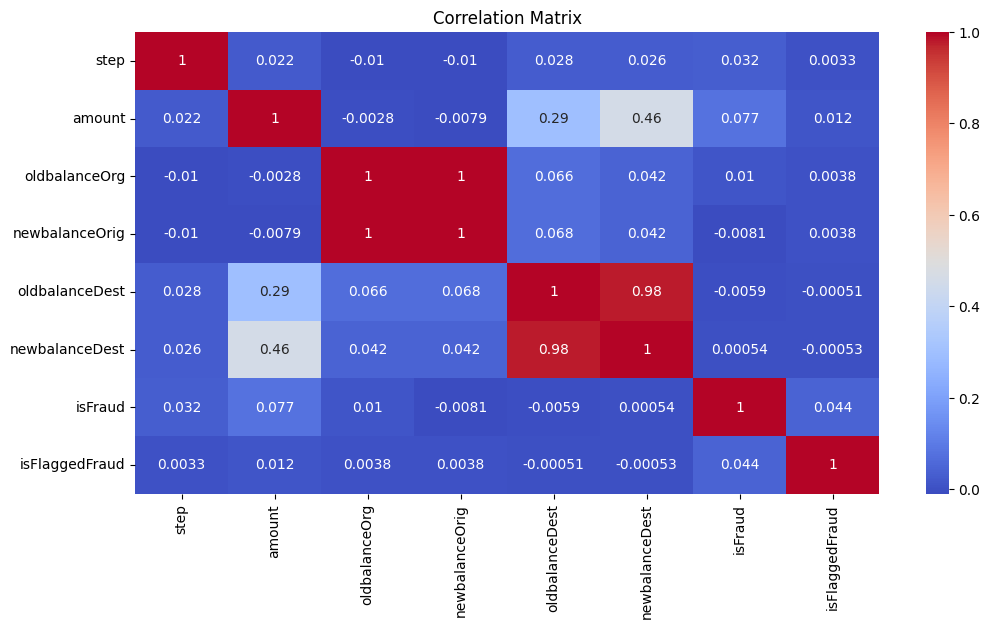

In [9]:
print("\nCorrelation between numerical columns:")
corel = df[numerical_cols].corr()
print(corel)

#correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corel, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
print("\nValue counts for categorical columns (top 10 for brevity):")
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
# Displaying top 10 for columns with many unique values
    print(df[col].value_counts().head(10))


Value counts for categorical columns (top 10 for brevity):

--- Column: type ---
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

--- Column: nameOrig ---
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1065307291    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

--- Column: nameDest ---
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64


In [11]:
df.shape

(6362620, 11)


--- Step 4: Outlier Detection (using Box Plots) ---


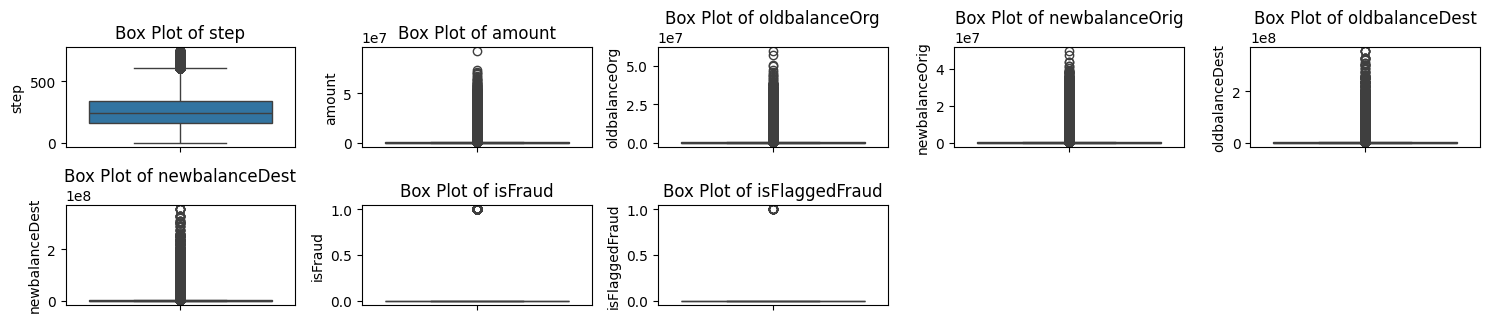

In [12]:
print("\n--- Step 4: Outlier Detection (using Box Plots) ---")

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# **EDA**

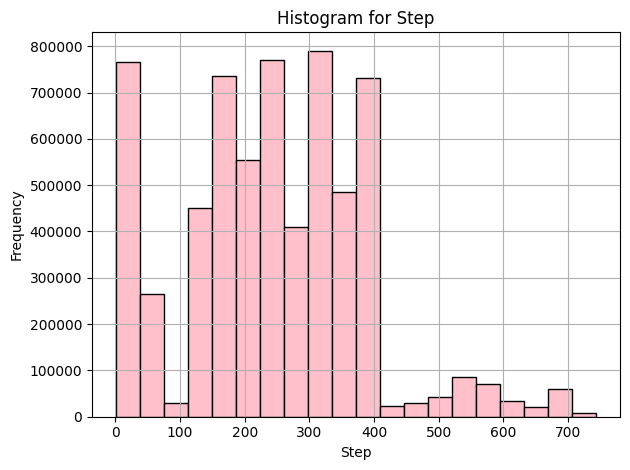

In [13]:
plt.figure()
plt.hist(df['step'], bins=20, color='pink', edgecolor='black')
plt.title('Histogram for Step')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

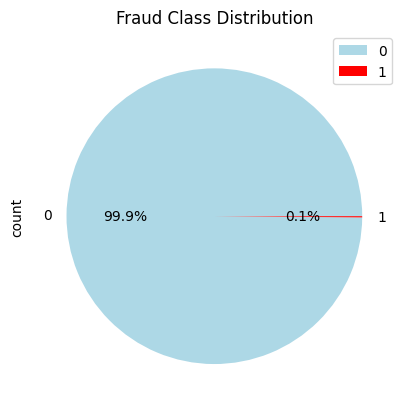

In [14]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title("Fraud Class Distribution")
plt.legend()
plt.show()

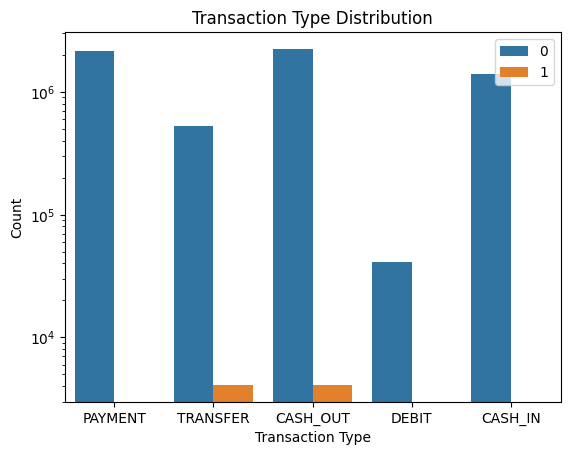

In [15]:
sns.countplot(x=df['type'].astype(str), data=df, hue='isFraud')
plt.yscale('log')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.legend()
plt.show()

# **MODEL**

XGBoost

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [17]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [18]:
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
encoder = LabelEncoder()
X_train['type'] = encoder.fit_transform(X_train['type'])
X_test['type'] = encoder.transform(X_test['type'])

In [20]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [21]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

[[1270847      34]
 [    351    1292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC Score: 0.999750661797274


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

XGBoost Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.97      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1270847      34]
 [    351    1292]]


In [24]:
X.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [25]:
X_sample = X_train.sample(n=500000, random_state=42)
y_sample = y_train.loc[X_sample.index]

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    random_state=42
)
dtc.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)[:,1]
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtc))


Confusion Matrix:
[[1270712     169]
 [    200    1443]]


In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dtc))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dtc):.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.90      0.88      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC Score: 0.9390692380186739
Decision Tree Accuracy: 0.9997
